# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Analysis

* The linear Regression plot (Temperature vs Latitude) shows a correlation(not strong) in north hemisphere  and a moderate correlation in south hemisphere. 

* The linear Regression plot (Humidity vs Latitude) shows no correlation in north hemisphere  and a weak correlation in south hemisphere. 

* The linear Regression plot (Cloudiness vs Latitude) shows no correlation in north hemisphere  and no correlation in south hemisphere. 



In [1]:
#!pip install pip
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

output_data_file

'output_data/cities.csv'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="




In [5]:
record_count = 1
set_count = 1
city_name = []
cloudiness = []    
country= []          
date = []          
humidity = []        
lat = []              
lng = []              
max_temp = []         
wind_speed = [] 


print('Beginning Data Retrieval')
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
        weather_response = requests.get(query_url + city).json()
        print('Processing Record' +' '+ str(record_count) +' '+ 'of Set'+''+ str(set_count) +'|'+ city)
        record_count+=1
        try:
            
            # Extract other data from weather data 
            city_name.append(weather_response['name'])
            cloudiness.append(weather_response['clouds']['all'])
            country.append(weather_response['sys']['country'])
            date.append(weather_response['dt'])
            humidity.append(weather_response['main']['humidity'])
            lat.append(weather_response['coord']['lat'])
            lng.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            wind_speed.append(weather_response['wind']['speed'])
            
            if (record_count==50):
                record_count = 0
                set_count +=1
                time.sleep(1)
            
        except:
            print("City not found. Skipping...")
            #pass
print('-----------------------------')
print('Data Retrieval Complete ')
print('-----------------------------')  

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set1|salvacion
Processing Record 2 of Set1|kapaa
Processing Record 3 of Set1|ambilobe
Processing Record 4 of Set1|mahebourg
Processing Record 5 of Set1|dingle
Processing Record 6 of Set1|mataura
Processing Record 7 of Set1|belushya guba
City not found. Skipping...
Processing Record 8 of Set1|tambopata
Processing Record 9 of Set1|kloulklubed
Processing Record 10 of Set1|xingyi
Processing Record 11 of Set1|hobart
Processing Record 12 of Set1|punta arenas
Processing Record 13 of Set1|severobaykalsk
Processing Record 14 of Set1|rikitea
Processing Record 15 of Set1|uk
City not found. Skipping...
Processing Record 16 of Set1|mende
Processing Record 17 of Set1|vaini
Processing Record 18 of Set1|cabo san lucas
Processing Record 19 of Set1|tuktoyaktuk
Processing Record 20 of Set1|borogontsy
Processing Record 21 of Set1|saldanha
Processing Record 22 of Set1|samusu
City not found. Skipping...
Processing Record 23 of Set

Processing Record 4 of Set5|airai
Processing Record 5 of Set5|egersund
Processing Record 6 of Set5|komsomolskiy
Processing Record 7 of Set5|ierapetra
Processing Record 8 of Set5|bilibino
Processing Record 9 of Set5|iizuka
Processing Record 10 of Set5|faanui
Processing Record 11 of Set5|vila franca do campo
Processing Record 12 of Set5|ponta do sol
Processing Record 13 of Set5|hare bay
Processing Record 14 of Set5|soure
Processing Record 15 of Set5|ilebo
Processing Record 16 of Set5|nemuro
Processing Record 17 of Set5|nivala
Processing Record 18 of Set5|port hedland
Processing Record 19 of Set5|archidona
Processing Record 20 of Set5|tiksi
Processing Record 21 of Set5|lolua
City not found. Skipping...
Processing Record 22 of Set5|taltal
Processing Record 23 of Set5|chokwe
Processing Record 24 of Set5|tautira
Processing Record 25 of Set5|majene
Processing Record 26 of Set5|vestmannaeyjar
Processing Record 27 of Set5|hun
Processing Record 28 of Set5|tabiauea
City not found. Skipping...
Pro

Processing Record 207 of Set5|atikokan
Processing Record 208 of Set5|pailitas
Processing Record 209 of Set5|takaka
Processing Record 210 of Set5|ahuimanu
Processing Record 211 of Set5|bosaso
Processing Record 212 of Set5|manutuke
Processing Record 213 of Set5|kavieng
Processing Record 214 of Set5|sunrise manor
Processing Record 215 of Set5|mugur-aksy
Processing Record 216 of Set5|lumeje
Processing Record 217 of Set5|lhuntshi
City not found. Skipping...
Processing Record 218 of Set5|wuwei
Processing Record 219 of Set5|alicia
Processing Record 220 of Set5|hervey bay
Processing Record 221 of Set5|brigham city
Processing Record 222 of Set5|mehamn
Processing Record 223 of Set5|havoysund
Processing Record 224 of Set5|surgut
Processing Record 225 of Set5|aginskoye
Processing Record 226 of Set5|chernyshevskiy
Processing Record 227 of Set5|lusambo
Processing Record 228 of Set5|sorland
Processing Record 229 of Set5|hatillo
Processing Record 230 of Set5|xai-xai
Processing Record 231 of Set5|nkong

Processing Record 404 of Set5|xifeng
Processing Record 405 of Set5|hihifo
City not found. Skipping...
Processing Record 406 of Set5|nueve de julio
Processing Record 407 of Set5|alcudia
Processing Record 408 of Set5|ostrovnoy
Processing Record 409 of Set5|axim
Processing Record 410 of Set5|margate
Processing Record 411 of Set5|yasnogorsk
Processing Record 412 of Set5|morondava
Processing Record 413 of Set5|gao
Processing Record 414 of Set5|poum
Processing Record 415 of Set5|chauk
Processing Record 416 of Set5|sovetskaya gavan
Processing Record 417 of Set5|oksfjord
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = {
    "City" :city_name,
    "Cloudiness": cloudiness ,  
    "Country" : country  ,   
    "Date" :  date   ,    
    "Humidity": humidity  , 
    "Lat" :  lat,        
    "Lng" :  lng ,        
    "Max Temp" : max_temp  ,   
    "Wind Speed" :wind_speed
    
                }
weather_data = pd.DataFrame(weather_data)
weather_data.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Salvacion,92,PH,1580691036,89,7.98,126.13,22.98,2.28
1,Kapaa,20,US,1580690863,65,22.08,-159.32,26.00,4.60
2,Ambilobe,100,MG,1580691037,91,-13.20,49.05,24.11,1.38
3,Mahebourg,61,MU,1580691037,77,-20.41,57.70,25.56,2.24
4,Dingle,81,PH,1580691037,79,11.00,122.67,22.74,5.17
5,Mataura,99,NZ,1580691037,98,-46.19,168.86,15.56,2.24
6,Tambopata,98,PE,1580691038,95,-12.73,-69.18,24.38,1.95
7,Kloulklubed,75,PW,1580691038,74,7.04,134.26,29.00,4.10
8,Xingyi,22,CN,1580691038,98,24.19,102.82,7.02,0.85
9,Hobart,40,AU,1580690839,35,-42.88,147.33,14.00,7.20


In [7]:
weather_data.to_csv('output_data')

In [8]:
weather_data.count()


City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

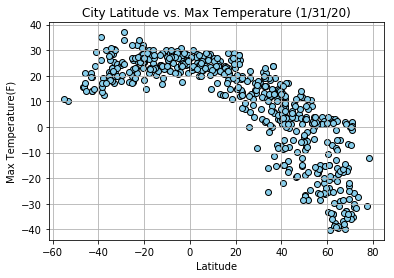

In [9]:
x_values= weather_data['Lat']
y_values = weather_data['Max Temp']

# Plot scatter plot
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
# Label plot
plt.title("City Latitude vs. Max Temperature (1/31/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid()
plt.savefig("../Figures/f1.png")
plt.show()

# cities with 

#### Latitude vs. Humidity Plot

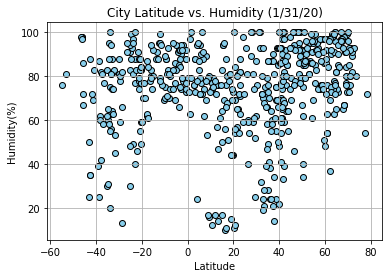

In [10]:
x_values= weather_data['Lat']
y_values = weather_data['Humidity']

# Plot scatter plot
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
# Label plot
plt.title("City Latitude vs. Humidity (1/31/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig("../Figures/f2.png")
plt.show()


#### Latitude vs. Cloudiness Plot

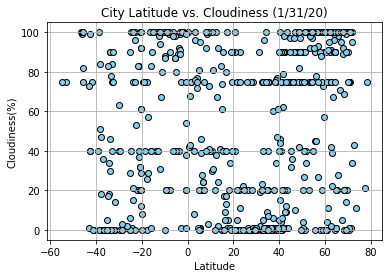

In [11]:
x_values= weather_data['Lat']
y_values = weather_data['Cloudiness']

# Plot scatter plot
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
# Label plot
plt.title("City Latitude vs. Cloudiness (1/31/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.savefig("../Figures/f3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

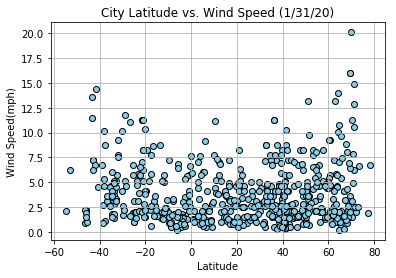

In [12]:
x_values= weather_data['Lat']
y_values = weather_data['Wind Speed']

# Plot scatter plot
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
# Label plot
plt.title("City Latitude vs. Wind Speed (1/31/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig("../Figures/f4.png")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

def lnr_reg (x_values, y_values, x_label, y_label):
        
        # Perform a linear regression on temperature vs. latitude
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
       # Create Plot
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r-")

        # Label plot and annotate the line equation
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.annotate(line_eq,(round(x_values.mean()+5),round(y_values.mean()-2)),fontsize=15,color="red")

        # Print r square value
        print(f"The r-squared is: {rvalue}")

        # Show plot
        plt.show()


In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = weather_data.loc[weather_data['Max Temp']>=0]

south_hem_df = weather_data.loc[weather_data['Max Temp']<0]

    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6996558787075106


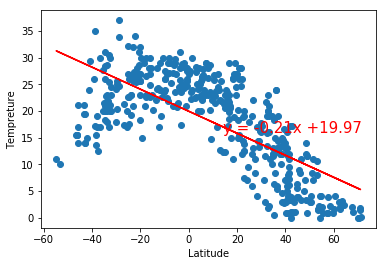

In [15]:
y_values = north_hem_df['Max Temp']
x_values = north_hem_df['Lat']
y_label = "Tempreture"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.5128369190240093


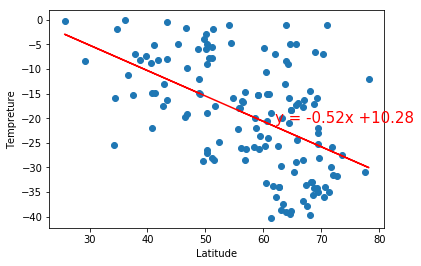

In [16]:
y_values = south_hem_df['Max Temp']
x_values = south_hem_df['Lat']
y_label = "Tempreture"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02643447088387548


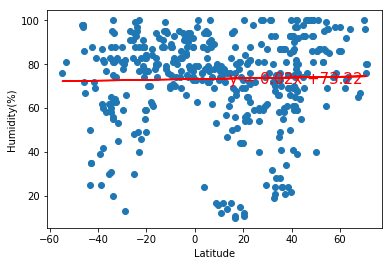

In [17]:
y_values = north_hem_df['Humidity']
x_values = north_hem_df['Lat']
y_label = "Humidity(%)"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34636581774525405


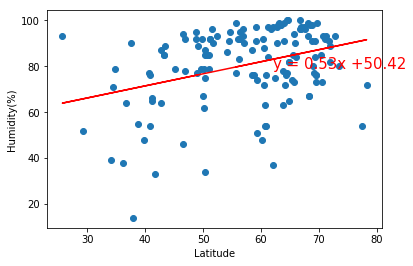

In [18]:
y_values = south_hem_df['Humidity']
x_values = south_hem_df['Lat']
y_label = "Humidity(%)"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05146451963287195


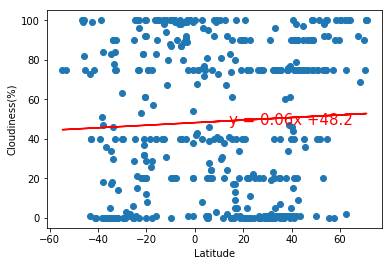

In [19]:
y_values = north_hem_df['Cloudiness']
x_values = north_hem_df['Lat']
y_label = "Cloudiness(%)"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2858656238685186


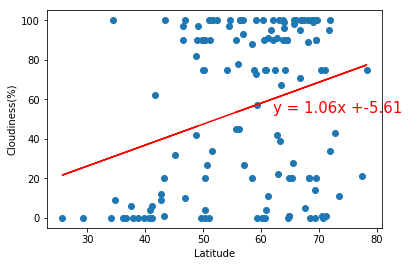

In [20]:
y_values = south_hem_df['Cloudiness']
x_values = south_hem_df['Lat']
y_label = "Cloudiness(%)"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07385054735970982


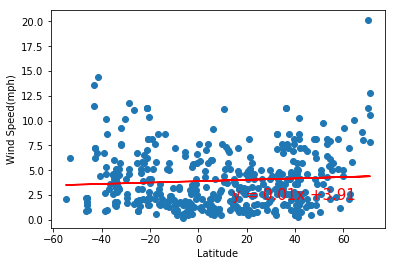

In [21]:
y_values = north_hem_df['Wind Speed']
x_values = north_hem_df['Lat']
y_label = "Wind Speed(mph)"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2869837194233956


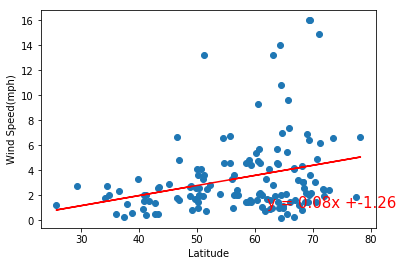

In [22]:
y_values = south_hem_df['Wind Speed']
x_values = south_hem_df['Lat']
y_label = "Wind Speed(mph)"
x_label = "Latitude"
lnr_reg (x_values, y_values,x_label,y_label)